In [45]:
import os 
import cv2
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import math

In [9]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

Tous les kanjis

In [10]:

path = "ETL8G"
files = os.listdir(path)
dico = []
for i in files:
    f = i.split("x")
    if len(f) == 2:
        dico.append(chr(int(f[1], 16)))
print(len(dico))
print(dico)

956
['あ', 'い', 'う', 'え', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'ゃ', 'や', 'ゅ', 'ゆ', 'ょ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん', '一', '丁', '七', '万', '三', '上', '下', '不', '世', '両', '中', '主', '久', '乗', '九', '予', '争', '事', '二', '五', '交', '京', '人', '仁', '今', '仏', '仕', '他', '付', '代', '令', '以', '仮', '件', '任', '休', '会', '伝', '似', '位', '低', '住', '体', '何', '余', '作', '使', '例', '供', '依', '価', '便', '係', '俗', '保', '信', '修', '俵', '倉', '個', '倍', '候', '借', '停', '健', '側', '備', '働', '像', '億', '元', '兄', '先', '光', '児', '党', '入', '全', '八', '公', '六', '共', '兵', '具', '典', '兼', '内', '円', '再', '写', '冬', '冷', '処', '出', '刀', '分', '切', '刊', '列', '初', '判', '別', '利', '制', '刷', '券', '則', '前', '創', '力', '功', '加', '助', '努', '労', '効', '勇', '勉', '動', '務', '勝', '勢', '勤', '勧', 

Exemple 1 image

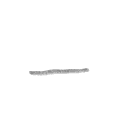

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

CPU times: total: 15.6 ms
Wall time: 22.9 ms


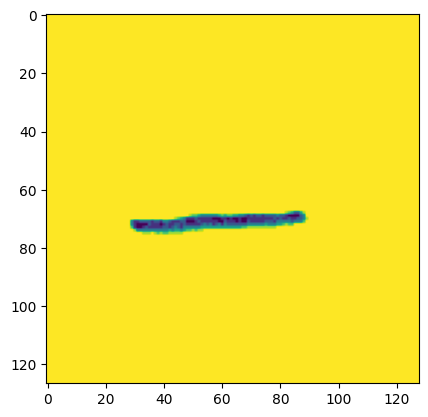

In [33]:
%%time
img = np.asarray(Image.open(path+"/0x4e00/000862.png"))
display(Image.open(path+"/0x4e00/000862.png"))
display(img)
imgplot = plt.imshow(img)

## Vérifier que toutes les images sont de même taille

In [ ]:
from multiprocessing import Process
    #this is the function to be parallelized
    def image_load_here(image_path):
        pass 

if __name__ == '__main__':
    #Start the multiprocesses and provide your dataset.
    p = Process(target=image_load_here,['img1', 'img2', 'img3', 'img4'])
    p.start()
    p.join()

In [35]:
%%time
data = []

for folder_name in os.listdir('ETL8G'):
    folder_path = os.path.join('ETL8G', folder_name)
    if os.path.isdir(folder_path):
        # Parcourir les fichiers dans le dossier
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            # Vérifier si c'est un fichier image
            if filename.endswith('.png'):
                # Charger l'image avec PIL
                image =  np.asarray(Image.open(file_path))
                # Récupérer la taille de l'image
                image_size = image.size
                # Ajouter les données au DataFrame
                data.append({'Image': image, 'Shape': image_size, 'Kanji': folder_name})
print("finito")

finito
CPU times: total: 1min 20s
Wall time: 4min 36s


In [36]:
df = pd.DataFrame(data)

In [37]:
df

,Image,Shape,Kanji
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042
...,...,...,...
153911,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b
153912,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b
153913,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b
153914,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b


In [42]:
print(df['Kanji'].value_counts())
print(df['Shape'].value_counts())

Kanji
0x3042    161
0x76f4    161
0x7591    161
0x75c5    161
0x767a    161
         ... 
0x5bb6    161
0x5bb9    161
0x5bbf    161
0x5bc4    161
0x9f3b    161
Name: count, Length: 956, dtype: int64
Shape
16256    153916
Name: count, dtype: int64


In [50]:
df['Image'][156].shape
print(127*128)

16256
